## Importing Libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading Dataset:

In [2]:
gold = pd.read_csv("gold_price.csv")
gold.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


##### Getting shape of the dataset:

In [3]:
gold.shape

(4718, 7)

##### Checking statistical information:

In [4]:
gold.describe()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
count,4718.000000,4682.000000,4718.000000,4682.000000,4718.000000,4682.000000
mean,959.990812,959.728684,625.068432,624.921846,773.892791,773.843716
std,449.456217,449.487106,324.491391,324.544149,351.555806,351.696708
min,256.700000,255.950000,176.572000,176.441000,276.711000,277.667000
25%,449.112500,448.612500,244.576750,244.463500,361.393500,361.338750
50%,1113.125000,1112.275000,717.145000,716.210500,874.354500,875.141500
75%,1293.750000,1294.225000,939.065500,939.266500,1085.967750,1085.816250
max,1896.500000,1895.000000,1265.900000,1265.010000,1389.890000,1392.030000


##### Checking Data Types:

In [5]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4718 non-null   object 
 1   USD (AM)   4718 non-null   float64
 2   USD (PM)   4682 non-null   float64
 3   GBP (AM)   4718 non-null   float64
 4   GBP (PM)   4682 non-null   float64
 5   EURO (AM)  4718 non-null   float64
 6   EURO (PM)  4682 non-null   float64
dtypes: float64(6), object(1)
memory usage: 258.1+ KB


We see that the column `Date` is of the type "Object". We'll convert it into the **DateTime** Column.

##### Checking Null Values:

In [6]:
gold.isnull().sum()

Date          0
USD (AM)      0
USD (PM)     36
GBP (AM)      0
GBP (PM)     36
EURO (AM)     0
EURO (PM)    36
dtype: int64

We see that there are 36 Null values present in the columns `USD (PM)`, `GBP (PM)` and `EURO (PM)`. These values can't be null for the analysis. Also, we can't replace the Null with **0**, because Gold Price can't be 0. Let's impute the Null Values:

##### Imputing Null Values with Mean of the column values:

In [7]:
gold['USD (PM)'] = gold['USD (PM)'].fillna(gold['USD (PM)'].mean())
gold['GBP (PM)'] = gold['GBP (PM)'].fillna(gold['GBP (PM)'].mean())
gold['EURO (PM)'] = gold['EURO (PM)'].fillna(gold['EURO (PM)'].mean())

##### Re-checking the Null Values:

In [8]:
gold.isnull().sum()

Date         0
USD (AM)     0
USD (PM)     0
GBP (AM)     0
GBP (PM)     0
EURO (AM)    0
EURO (PM)    0
dtype: int64

##### Converting `Date` column into DateTime:

In [9]:
gold['Date'] = pd.to_datetime(gold['Date'])

## Checking Outliers using Boxplot:

##### Getting only numerical columns:

In [10]:
num_vars = list(gold.drop('Date', axis=1))
num_vars

['USD (AM)', 'USD (PM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)', 'EURO (PM)']

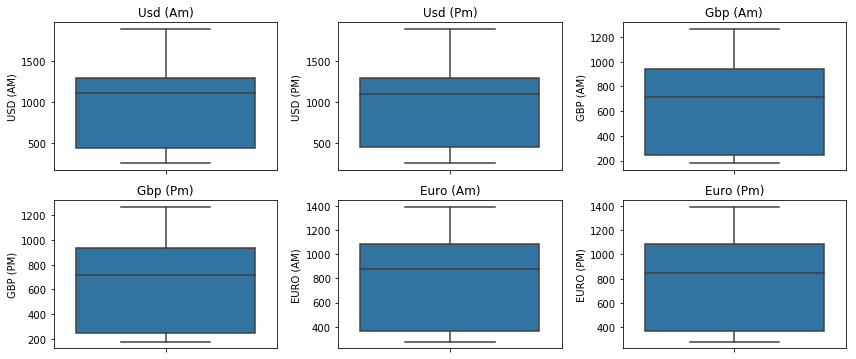

In [11]:
plt.figure(figsize=[12,10])
for i in range(0, len(num_vars)):
    plt.subplot(4,3,i+1)
    sns.boxplot(y=num_vars[i], data=gold)
    plt.title(num_vars[i].title())
    plt.tight_layout()

From the above Boxplots, it is clear that there are no outliers present in Data.

## Feature Engineering:

##### Creating Month and Year Columns from the `Date` column:

In [12]:
gold['Month'] = gold['Date'].dt.month_name()
gold['Year'] = gold['Date'].dt.year

In [13]:
gold.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Month,Year
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334,January,2001
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655,January,2001
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049,January,2001
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882,January,2001
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481,January,2001


## Exploratory Data Analysis:

In [14]:
gold['Return'] = gold['USD (PM)'].pct_change() * 100
gold = gold.dropna()
gold.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Month,Year,Return
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655,January,2001,-1.457027
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049,January,2001,-0.018716
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882,January,2001,0.112317
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481,January,2001,0.336574
5,2001-01-09,267.75,267.00,179.855,179.195,284.507,283.590,January,2001,-0.484532


In [15]:
df = gold.groupby('Month').sum()
df

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Year,Return
Month,,,,,,,,
April,360133.20,359936.350000,234006.168,233803.676000,290489.655,290358.428000,757764,7.959322
August,394104.90,394180.250000,259282.980,259384.707000,318245.000,318389.236000,810034,43.964765
December,345537.75,345399.782636,224144.901,224073.419449,277071.259,277138.797781,725422,1196.852232
February,369514.70,369507.300000,240797.180,240939.507000,298857.593,299026.127000,769836,32.156253
January,379203.25,379228.800000,247549.765,247569.246000,306715.767,306845.068000,810032,57.413009
July,403774.40,403751.850000,264140.733,264109.933000,326812.504,326787.327000,846208,6.405270
June,384123.30,384104.250000,250366.780,250301.534000,311326.606,311304.253000,806021,-2.480311
March,394146.45,393900.200000,258827.976,258716.237000,319103.311,318923.131000,824099,-11.861710
May,371070.40,370954.600000,241338.553,241326.827000,300569.131,300619.548000,777871,7.570117


## Data Visualization:

##### Barplot:

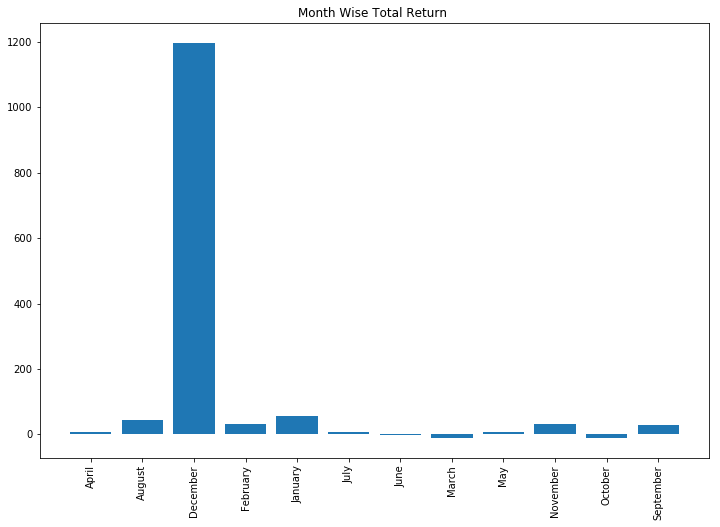

In [16]:
plt.figure(figsize=(12,8))
plt.bar(df.index, df['Return'])
plt.xticks(rotation=90)
plt.title("Month Wise Total Return ")
plt.show()

In the month of December, we are geeting maximum return.

##### Correlation using Heatmap:

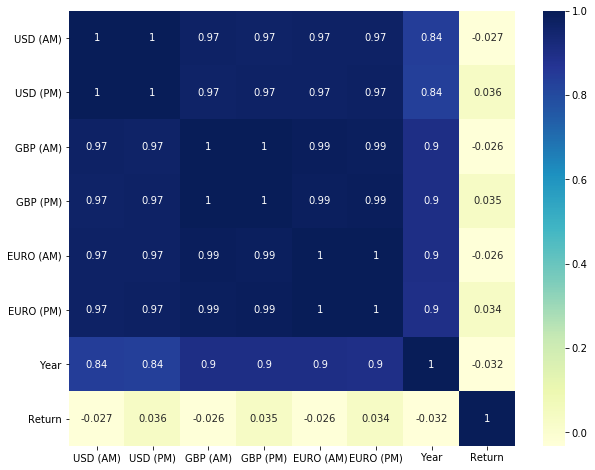

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(gold.corr(), annot=True, cmap='YlGnBu')
plt.show()

## Train-Test Split:

##### Dropping the unnecessary columns:

In [18]:
gold = gold.drop(['Date', 'Month', 'Year'], axis=1)
gold.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Return
1,269.00,267.15,178.916,177.390,281.823,281.655,-1.457027
2,268.75,267.10,178.869,178.352,282.538,282.049,-0.018716
3,268.00,267.40,178.488,178.148,280.775,280.882,0.112317
4,268.60,268.30,178.769,178.664,282.410,282.481,0.336574
5,267.75,267.00,179.855,179.195,284.507,283.590,-0.484532


In [19]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(gold, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
df_train.shape

(3301, 7)

In [21]:
df_test.shape

(1416, 7)

##### Listing columns of the dataset:

In [22]:
cols = list(gold)
print(cols)

['USD (AM)', 'USD (PM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)', 'EURO (PM)', 'Return']


##### Scaling the dataset using Mixax Scaler:

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[cols] = scaler.fit_transform(df_train[cols])

In [24]:
df_train.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Return
4615,0.631114,0.626704,0.739261,0.736948,0.785149,0.777586,0.203710
663,0.063788,0.063634,0.045787,0.045661,0.040484,0.039729,0.201770
4545,0.612605,0.429382,0.752471,0.411991,0.745085,0.445256,0.128890
4560,0.632577,0.631311,0.760421,0.755992,0.772640,0.767993,0.205138
4323,0.642975,0.646411,0.705295,0.698678,0.714419,0.712428,0.203294


In [25]:
df_test[cols] = scaler.transform(df_test[cols])

In [26]:
df_test.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Return
2635,0.779851,0.782038,0.698880,0.700750,0.693600,0.694893,0.204022
4208,0.628339,0.628016,0.759485,0.757461,0.732198,0.724641,0.204611
3217,0.648585,0.650865,0.595588,0.593685,0.630373,0.629829,0.207628
3419,0.643554,0.643086,0.540640,0.538430,0.619159,0.615084,0.206528
220,0.012776,0.012538,0.013749,0.014025,0.032781,0.032404,0.201499


##### Getting Data in X and y variables:

In [27]:
y_train = df_train.pop("Return")
X_train = df_train

In [28]:
X_train.shape

(3301, 6)

In [29]:
y_train.shape

(3301,)

##### Reshaping the data for fitting in the model:

In [30]:
y_train = y_train.values.reshape(-1,1)

##### Model Fitting:

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

##### Getting Coefficients:

In [33]:
lm.coef_

array([[-1.04970122,  1.05252103,  0.03037355, -0.02975964,  0.09819875,
        -0.09873102]])

##### Getting Intercept"

In [34]:
lm.intercept_

array([0.20462135])

##### Prediction on Train Data:

In [35]:
y_train_pred = lm.predict(X_train)

##### Getting r-2 score of Train Data: 

In [36]:
from sklearn.metrics import r2_score
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.5525261583743029


##### Getting Test Data in X and y varibles:

In [37]:
y_test = df_test.pop("Return")
X_test = df_test

In [38]:
X_test.shape

(1416, 6)

In [39]:
y_test.shape

(1416,)

##### Reshaping the data:

In [40]:
y_test = y_test.values.reshape(-1,1)

##### Prediction on Test Data:

In [41]:
y_test_pred = lm.predict(X_test)

##### Getting r-2 score of Test Data:

In [42]:
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.5860878741207051
